In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:06<00:00, 32.8MB/s]
100% 163M/163M [00:06<00:00, 27.0MB/s]


In [ ]:
#extracting the zip file
from zipfile import ZipFile
dataset="/content/face-mask-dataset.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Dataset is extracted")

Dataset is extracted


Importing Dependencies


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [ ]:
with_mask_files=os.listdir("/content/data/with_mask")
print(with_mask_files[0:10])

['with_mask_1981.jpg', 'with_mask_196.jpg', 'with_mask_868.jpg', 'with_mask_2728.jpg', 'with_mask_975.jpg', 'with_mask_1528.jpg', 'with_mask_2510.jpg', 'with_mask_3592.jpg', 'with_mask_2103.jpg', 'with_mask_1747.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:10])

['without_mask_183.jpg', 'without_mask_2936.jpg', 'without_mask_1663.jpg', 'without_mask_3535.jpg', 'without_mask_1588.jpg', 'without_mask_3724.jpg', 'without_mask_2493.jpg', 'without_mask_622.jpg', 'without_mask_283.jpg', 'without_mask_715.jpg']


In [ ]:
print('Number of Data with mask images:', len(with_mask_files))
print('Number of Data without mask images:', len(without_mask_files))

Number of Data with mask images: 3725
Number of Data without mask images: 3828


**Creating Labels for 2 classes**

without mask-->0

with mask-->1

In [ ]:
with_mask_labels=[0]*len(with_mask_files)
without_mask_labels=[1]*len(without_mask_files)
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [ ]:
total_labels=with_mask_labels+without_mask_labels
print(total_labels[0:5])
print(total_labels[-5:])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


**Displaying Images**

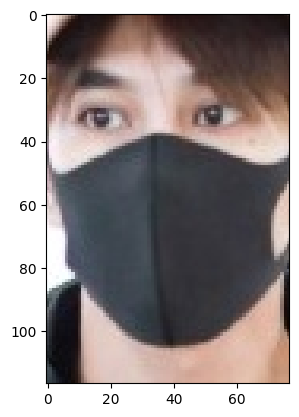

In [ ]:
#displaying images
img=mpimg.imread("/content/data/with_mask/with_mask_120.jpg")
imgplot=plt.imshow(img)
plt.show(imgplot)

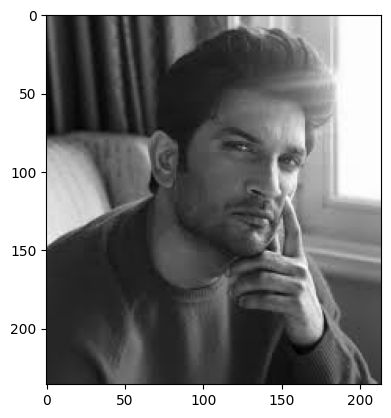

In [ ]:
#displaying without_mask_images
img=mpimg.imread("/content/data/without_mask/without_mask_2511.jpg")
imgplot=plt.imshow(img)
plt.show(imgplot)


Resizing the Images

Converting The images to numpy arrays

In [ ]:
#converting images into numpy arrays
with_mask_path="/content/data/with_mask/"
without_mask_path="/content/data/without_mask/"

#here data is a list
data=[]
def add_data(path,files):
  for img_file in files:
    image=Image.open(path+img_file)
    image=image.resize((128,128))
    image=image.convert("RGB")
    image=np.array(image)
    data.append(image)

add_data(with_mask_path,with_mask_files)
add_data(without_mask_path,without_mask_files)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
print(len(data))
print(type(data[0]))
data[0].shape

7553
<class 'numpy.ndarray'>


(128, 128, 3)

In [ ]:
#converting image list and label list to numpy arrays

X=np.array(data)
Y=np.array(total_labels)

In [ ]:
print(type(X))
print(type(Y))

print(X.shape)
print(Y.shape)

#no. of arrays,height,width and color of the channel

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7553, 128, 128, 3)
(7553,)


In [ ]:
print(X[-1], Y[-1]);

[[[  7   8  12]
  [  6   6  10]
  [  3   2   7]
  ...
  [  5   7   6]
  [  6   8   7]
  [  7   9   8]]

 [[  6   7  11]
  [  5   5  10]
  [  3   2   7]
  ...
  [  5   7   6]
  [  6   8   7]
  [  7   9   8]]

 [[  3   4   8]
  [  4   5   9]
  [  2   3   7]
  ...
  [  3   5   4]
  [  4   6   5]
  [  3   7   6]]

 ...

 [[125 138 147]
  [119 132 141]
  [110 124 133]
  ...
  [ 16  26  36]
  [ 15  25  35]
  [ 14  24  34]]

 [[ 83  95 106]
  [ 76  88 100]
  [ 67  79  91]
  ...
  [  7  15  26]
  [  6  14  25]
  [  4  13  23]]

 [[ 58  70  81]
  [ 52  64  77]
  [ 47  59  73]
  ...
  [  2  10  21]
  [  1   9  20]
  [  0   7  18]]] 1


**Train Test Split**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
#random_state-->The random_state parameter in train_test_split ensures reproducibility. When random_state is set to a specific integer, such as 2, it makes sure that every time you run the code, the data will be split in the exact same way.

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


**Feature Scaling**

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

**Building Convolutional Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
num_of_classes=2
model=Sequential([
    Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64,kernel_size=(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),
    Dense(64,activation="relu"),
    Dense(num_of_classes,activation="softmax")
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compiling the neural network
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
#training the neural network
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 150s 871ms/step - accuracy: 0.7118 - loss: 0.7170 - val_accuracy: 0.8694 - val_loss: 0.3003
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 156s 917ms/step - accuracy: 0.8812 - loss: 0.2855 - val_accuracy: 0.9256 - val_loss: 0.1886
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 206s 942ms/step - accuracy: 0.9178 - loss: 0.2124 - val_accuracy: 0.9339 - val_loss: 0.2017
Epoch 4/10
 75/170 ━━━━━━━━━━━━━━━━━━━━ 1:20 847ms/step - accuracy: 0.9385 - loss: 0.1784

**Model Prediction**

In [ ]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print("Test Accuracy:",accuracy)

In [ ]:
#plotting loss and accuracy

h=history
plt.plot(h.history["loss"],label="train_loss")
plt.plot(h.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

plt.plot(h.history["accuracy"],label="train_accuracy")
plt.plot(h.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

**Predictive System**

In [ ]:
input_img_path=input("Path of the img to be predicted:")
input_img=cv2.imread(input_img_path)
cv2_imshow(input_img)

input_img_resized=cv2.resize(input_img,(128,128))
input_img_scaled=input_img_resized/255
input_img_reshaped=np.reshape(input_img_scaled,[1,128,128,3])

input_prediction=model.predict(input_img_reshaped)
print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
    print("The person in the image is wearing a mask")
else:
    print("The person in the image is not wearing a mask")


